In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Data Exploration

In [ ]:
# read_csv
profs <- read_csv('https://emyucel.com/sta235/profs.csv')

Rows: 463 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): minority, gender, credits, division, native, tenure, generation, class
dbl (6): age, beauty, eval, students, allstudents, prof

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
# The head command gives the first few rows of a dataframe
profs %>% head()

minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,generation,class
<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
yes,36,female,more,0.2899157,4.3,upper,yes,yes,24,43,1,genx,small
no,59,male,more,-0.7377322,4.5,upper,yes,yes,17,20,2,boomer,small
no,51,male,more,-0.5719836,3.7,upper,yes,yes,55,55,3,boomer,medium
no,40,female,more,-0.6779634,4.3,upper,yes,yes,40,46,4,genx,small
no,31,female,more,1.5097940,4.4,upper,yes,yes,42,48,5,genx,small
no,62,male,more,0.5885687,4.2,upper,yes,yes,182,282,6,silent,large


Let's explore some of our variables. Here's a histogram of the `eval` variable.

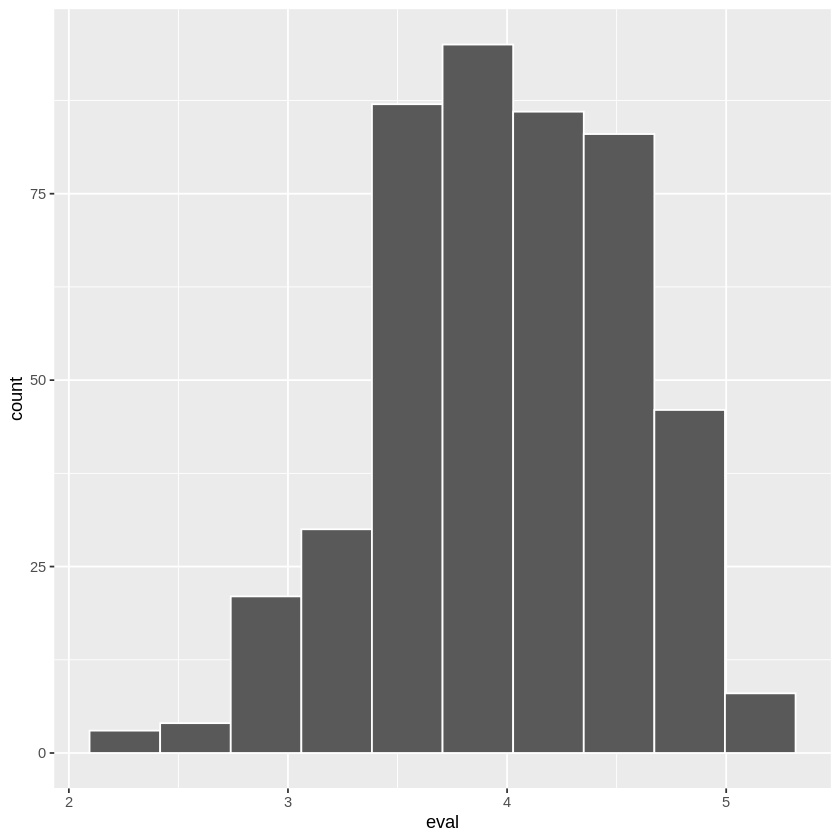

In [ ]:
ggplot(data=profs) +
  geom_histogram(aes(x=eval), bins=10, color='white')

Now let's try it for attractiveness. Fill in the blank with the appropriate variable name.

In [ ]:
ggplot(data=profs) +
  geom_histogram(aes(x=____________), bins=10, color='white')

ERROR: Error in parse(text = x, srcfile = src): <text>:2:25: unexpected input
1: ggplot(data=profs) +
2:   geom_histogram(aes(x=__
                           ^


Is there a relationship between attractiveness and evaluation? Let's look at a scatterplot. Fill in `x` and `y` with the variables you want to look at.

In [ ]:
ggplot(data=profs) +
  geom_point(aes(x=____________, y=_____________))

The plot indicates that there might be some association between the two. We can measure that association with the correlation coefficient. Recall that this measures the strength of a linear relationship between two variables. The `cor` function in R gives us this. The `$` tells R to look in the `profs` data for the variable name that follows.

In [ ]:
cor(profs$beauty, profs$eval)

[1] 0.1890391

# Linear Regression

Linear regression is a technique that finds the line of best fit that maps `x` onto `y`.  In other words, we're modeling the true relationship

$Y=\beta_0 + \beta_1 X + \varepsilon$

with our best estimates

$\hat Y = \hat\beta_0 + \hat\beta_1 X$ (the hats indicate estimates)

If we want to use `R`, we can use the `lm` function.

In [ ]:
# Build a regression model
lm1 <- lm(eval ~ beauty, data=profs) # this saves the model into an object called lm1
summary(lm1) # this prints out the results of our regression


Call:
lm(formula = eval ~ beauty, data = profs)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.80015 -0.36304  0.07254  0.40207  1.10373 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.99827    0.02535 157.727  < 2e-16 ***
beauty       0.13300    0.03218   4.133 4.25e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5455 on 461 degrees of freedom
Multiple R-squared:  0.03574,	Adjusted R-squared:  0.03364 
F-statistic: 17.08 on 1 and 461 DF,  p-value: 4.247e-05


What does this fitted line look like when plotted on our data?

`geom_smooth()` using formula = 'y ~ x'


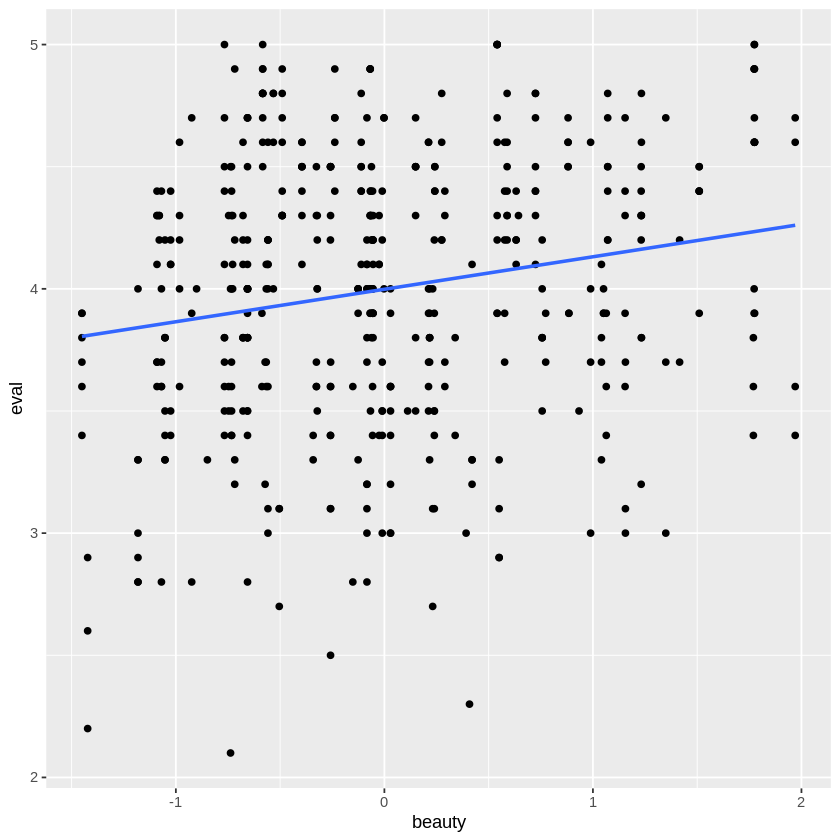

In [ ]:
ggplot(data=profs) +
  geom_point(aes(x=beauty, y=eval))+
  geom_smooth(aes(x=beauty, y=eval), method='lm', se=FALSE)

The line goes through the points, sure, but there seems to be a lot of variation around it. How certain are we of our estimates of the parameters of this line?

## Confidence Intervals for Coefficients

We can create a confidence interval for model coefficients using a simple built-in function called `confint()`

In [ ]:
confint(lm1) %>% round(4)

,2.5 %,97.5 %
(Intercept),3.9485,4.0481
beauty,0.0698,0.1962


## Predictions
Linear regressions are very easy to use to make predictions. We take the estimates from our summary table, and just write out an equation and plugin the value of interest for which we want a prediction. Our equation is

In [ ]:
# Fill in the correct coefficients below to obtain a prediction for `eval` when `beauty` is 0.5
______ + ______ * 0.5

If we want a bit more precision (and less copy pasting) we can use R's built in `predict()` function. The `predict()` function takes a model object as the first argument, and values of $X$ to be used by that model as a second argument. Below, try predicting the evaluation score for a very attractive professor.

In [ ]:
# Plug in different values of beauty
predict(lm1, list(beauty=_____))

Sometimes we want to know how confident we are in our predictions. For this, we can extend the predict function with a third argument. The `interval` argument can take "prediction" for prediction intervals for an individual response and "confidence" for confidence intervals for a mean response. Compare the two below. Which one is wider?

In [ ]:
predict(lm1, list(beauty=0.5), interval="prediction")

,fit,lwr,upr
1,4.064773,2.99127,5.138275


In [ ]:
predict(lm1, list(beauty=0.5), interval="confidence")

,fit,lwr,upr
1,4.064773,4.005772,4.123774


# Exploration
Let's see the impact of sample size and error on our estimates

In [ ]:
popeqn <- function(n, e){
    b <- sample(profs$beauty, n, replace=TRUE)
    data.frame(beauty=b,
                eval=(pmin(pmax(4+b*.133 + rnorm(n,0,e),1),5)),
                model=paste0('n=',sprintf("%04d",n))
                )
}

`geom_smooth()` using formula = 'y ~ x'


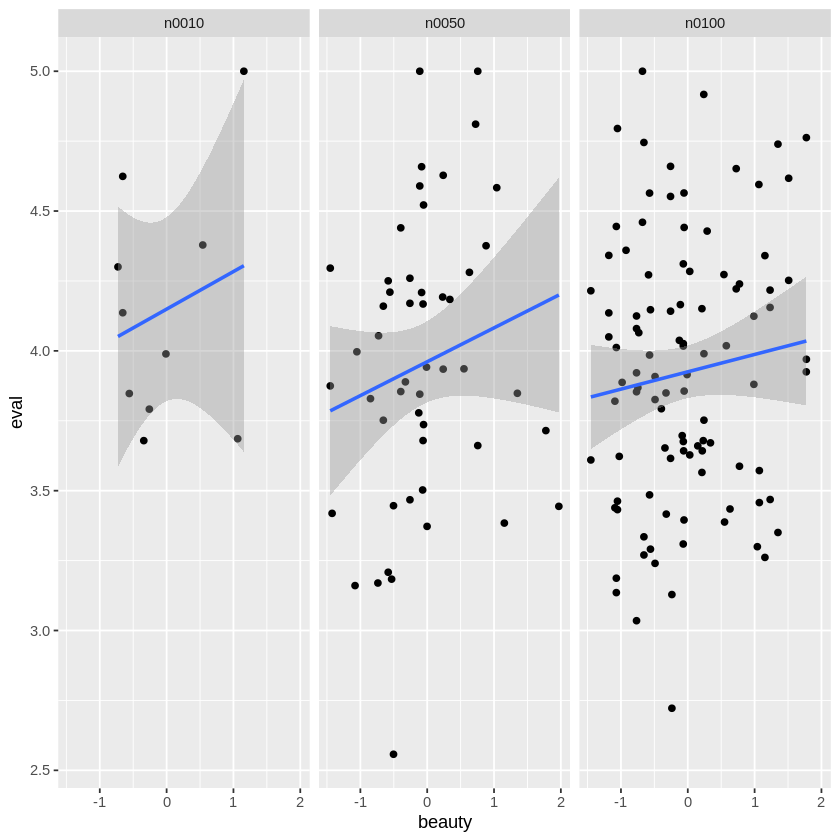

In [ ]:
#################
## CHANGE THIS ##
my_se <- 0.5   # number > 0 and less than +inf
#################

newdf <- NULL
for (i in c(10,50,100)){
    newdf <- rbind(newdf, popeqn(i,my_se))
}
ggplot(newdf)+
  geom_point(aes(x=beauty, y=eval))+
  geom_smooth(aes(x=beauty, y=eval), method='lm')+
  facet_wrap(~model)